In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import cv2

In [188]:
plt.rcParams['figure.figsize'] = (25, 10)

In [3]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

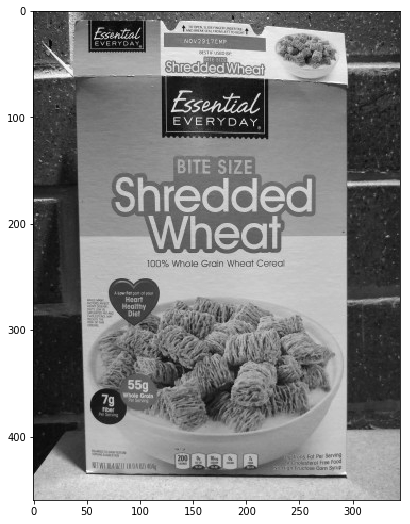

In [15]:
c1 = plt.imread('c1.jpg')
c1_gray = rgb2gray(c1)
plt.imshow(c1_gray,cmap='gray')
plt.show()

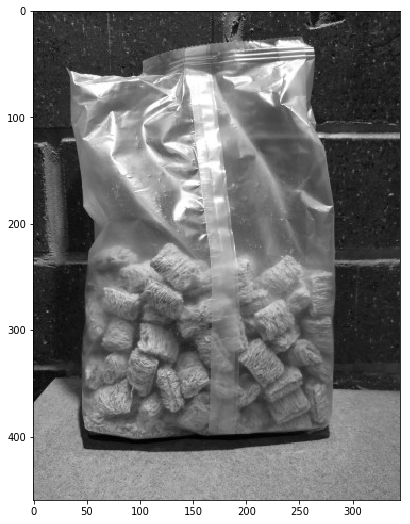

In [16]:
c2 = plt.imread('c2.jpg')
c2_gray = rgb2gray(c2)
plt.imshow(c2_gray,cmap='gray')
plt.show()

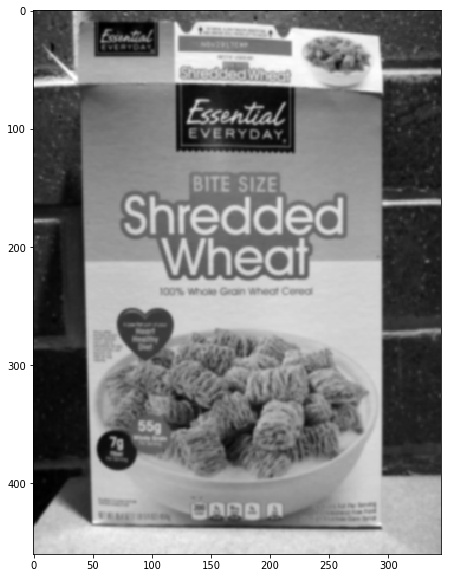

In [215]:
c1_low = scipy.ndimage.gaussian_filter(c1_gray,1)
plt.imshow(c1_low,cmap='gray')
plt.show()

In [216]:
kernel = np.array([[0, 0, 0],
                   [0,  1, 0],
                   [0, 0, 0]])
c2_high = c2_gray - scipy.ndimage.gaussian_filter(c2_gray,10)

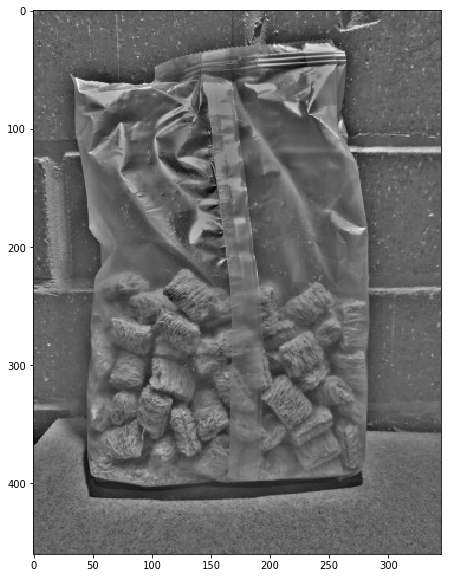

In [217]:
plt.imshow(c2_high,cmap='gray')
plt.show()

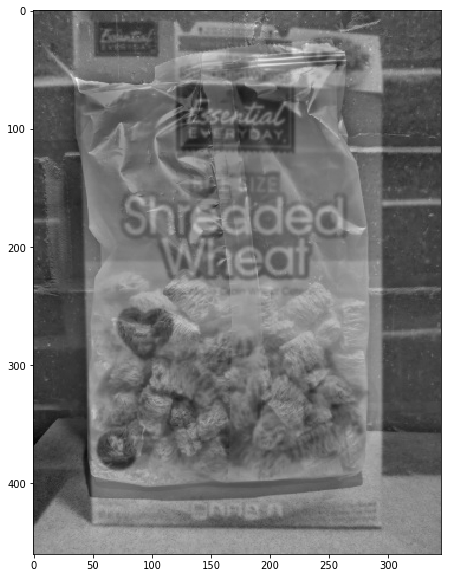

In [218]:
plt.imshow((c2_high+c1_low)/2,cmap='gray')
plt.show()

In [221]:
c1_high = c1_gray - scipy.ndimage.gaussian_filter(c1_gray,20)

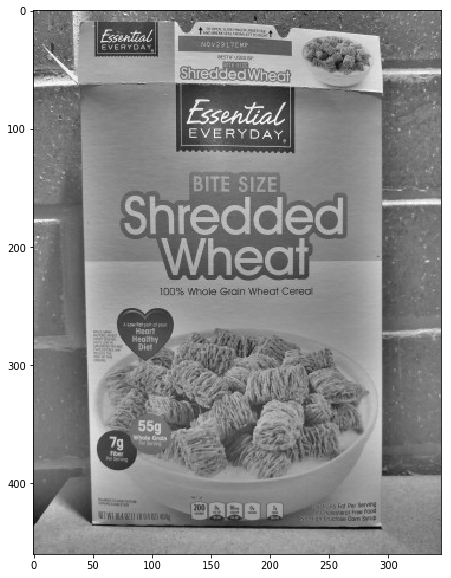

In [222]:
plt.imshow(c1_high,cmap='gray')
plt.show()

In [226]:
c2_low = scipy.ndimage.gaussian_filter(c2_gray,1)

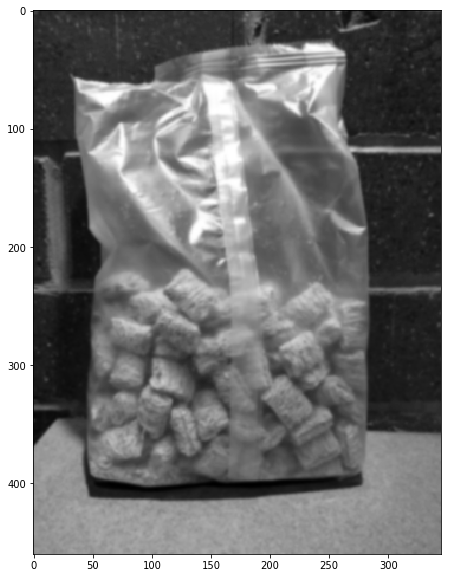

In [227]:
plt.imshow(c2_low,cmap='gray')
plt.show()

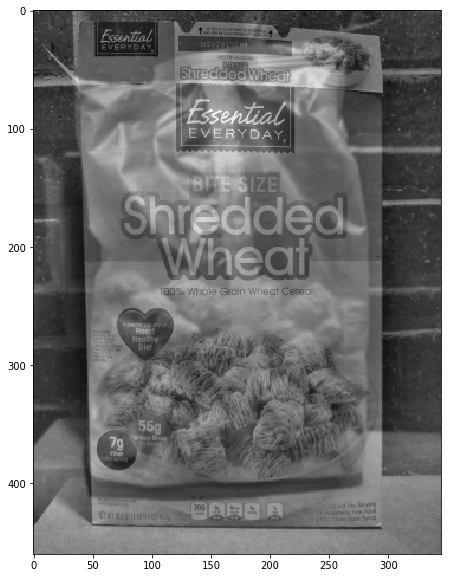

In [228]:
plt.imshow((c1_high+c2_low),cmap='gray')
plt.show()

In [66]:
face1 = plt.imread('yaleB05_albedo.jpg')/255
face2 = plt.imread('yaleB07_albedo.jpg')/255
np.max(face1)

0.7725490196078432

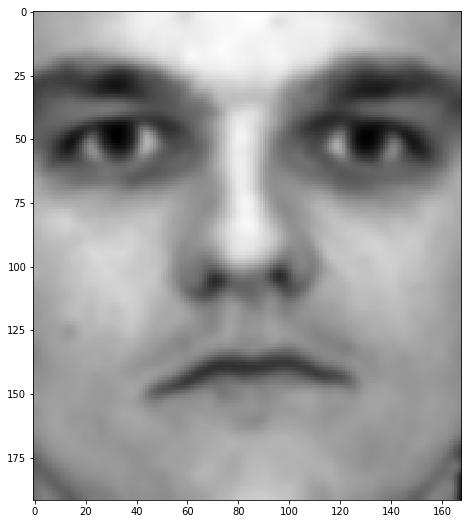

In [85]:
face2Low = scipy.ndimage.gaussian_filter(face2,2)
plt.imshow(face2Low,cmap='gray')
plt.show()

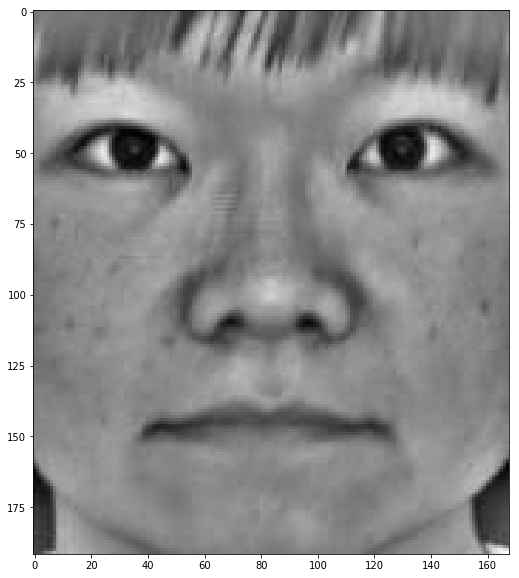

In [229]:
face1High = face1 - scipy.ndimage.gaussian_filter(face1,10)
plt.imshow(face1High,cmap='gray')
plt.show()

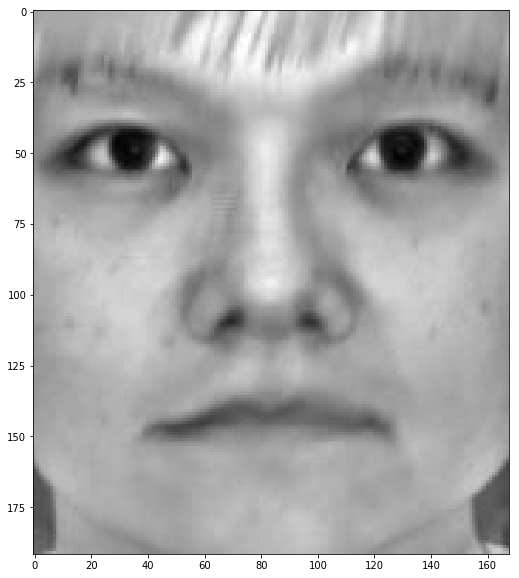

In [230]:
plt.imshow(face1High+face2Low,cmap='gray')
plt.show()

In [117]:
sky = plt.imread('sky.jpg')/255

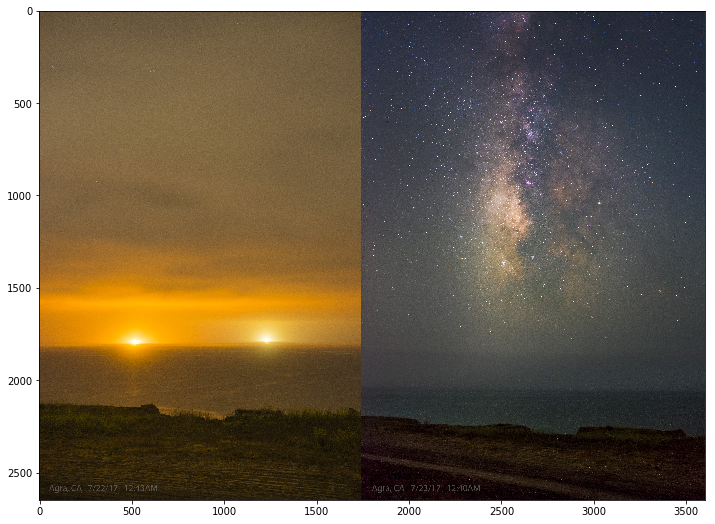

1.0


In [118]:
plt.imshow(sky)
plt.show()
print(np.max(sky))

In [119]:
x,y,_ = np.shape(sky)
evening = sky[:,:y//2-100,:]
night = sky[:,y//2+100:,:]


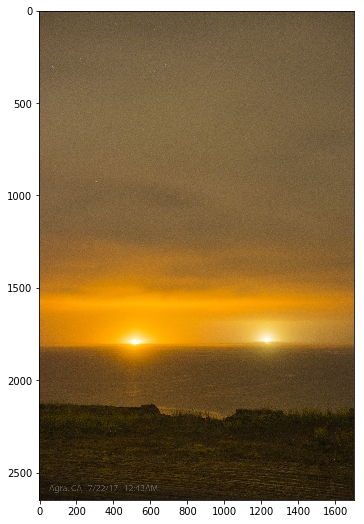

In [120]:
plt.imshow(evening)
plt.show()

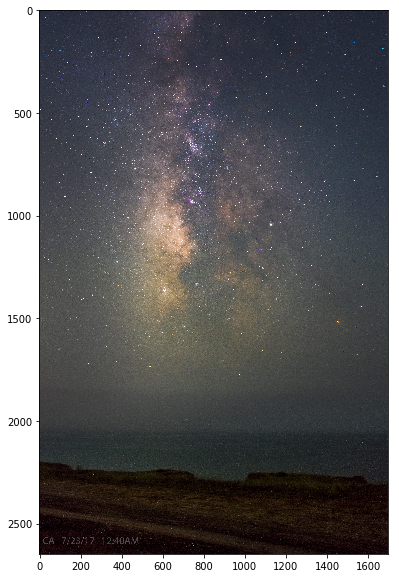

In [189]:
plt.imshow(night)
plt.show()

In [183]:
night_high = np.zeros(np.shape(night))
for i in range(3):
    night_high[:,:,i] = np.abs(night[:,:,i] - scipy.ndimage.gaussian_filter(night[:,:,i],512))
night_high = (night_high - np.min(night_high))/(np.max(night_high)-np.min(night_high))

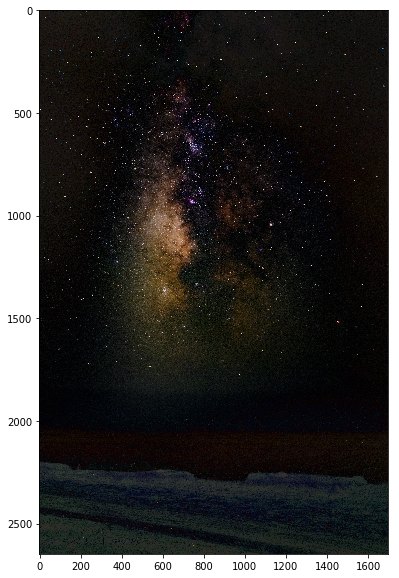

1.0


In [190]:
plt.imshow(night_high)
plt.show()
print(np.max(night_high))

In [237]:
evening_low = np.zeros(np.shape(evening))
for i in range(3):
    evening_low[:,:,i] =scipy.ndimage.gaussian_filter(evening[:,:,i],32)

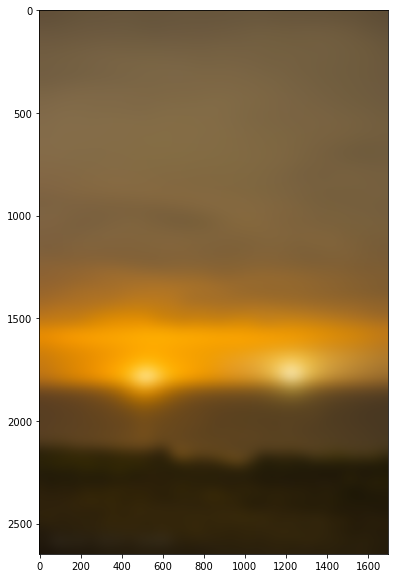

0.9985226939260248

In [238]:
plt.imshow(evening_low)
plt.show()
np.max(evening_low)

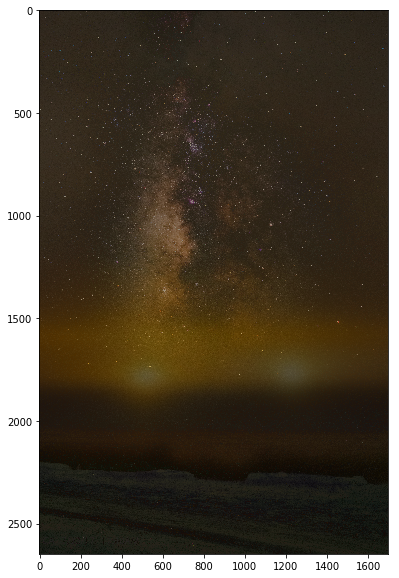

In [240]:
plt.imshow((evening_low/1.5+night_high)/2)
plt.show()